***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [2]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting


# Example 1 (Simple undirected graph)

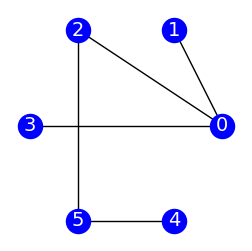

In [3]:
import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting

# Create a simple graph object G 
G = nx.Graph()

# Start adding edges (cf. Python counts things from 0 not one.)
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(2,5)
G.add_edge(4,5)

# plot the graph 
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [7]:
degree_sequence = []
for v in G.nodes():
    degree_sequence.append(G.degree(v))
    print("node={}, degree={}".format(v, G.degree(v)))

node=0, degree=3
node=1, degree=1
node=2, degree=2
node=3, degree=1
node=5, degree=2
node=4, degree=1


In [8]:
#degree_sequence = [d for n, d in G.degree()] 
print("degree_sequence=", degree_sequence)

degree_sequence= [3, 1, 2, 1, 2, 1]


In [9]:
degree_sequence.sort(reverse=True)
print("degree_sequence_sorted=", degree_sequence)

degree_sequence_sorted= [3, 2, 2, 1, 1, 1]


In [10]:
# Get the adjacency matrix of G and print it out

A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 1 0]]


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_45233/2044879075.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


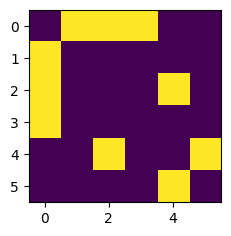

In [11]:
# plot the adjacency matrix 
fig = plt.figure(figsize=[2.5,2.5], constrained_layout=False)
ax = fig.add_subplot()
ax.imshow(A.todense());

# Example 2 (Simple directed graph)

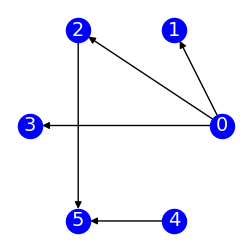

In [5]:
# Create a digraph object G 
G = nx.DiGraph()

# Start adding edges (cf. Python counts things from 0 not one.)
# The edges are now directed.
G.add_edge(0,1) 
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(2,5)
G.add_edge(4,5)

# plot the graph 
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [6]:
# Get the adjacency matrix of G and print it out

A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_80665/2044879075.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


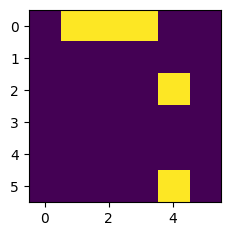

In [7]:
# plot the adjacency matrix 
fig = plt.figure(figsize=[2.5,2.5], constrained_layout=False)
ax = fig.add_subplot()
ax.imshow(A.todense());

# Example 3 (General directed graph)

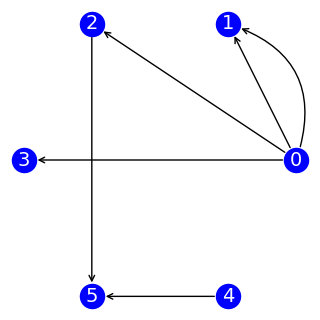

In [15]:
# Create a digraph object G 
G = nx.MultiDiGraph()

# Start adding edges (cf. Python counts things from 0 not one.)
# The edges are now directed.
G.add_edges_from([(0,0), (0, 1), (0,1), (0,2), (0,3), (2,5), (4,5)])

# plot the graph 
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.circular_layout(G)
names = {name: name for name in G.nodes}
nx.draw_networkx_nodes(G, pos, node_color = 'b', node_size = 300, alpha = 1)
nx.draw_networkx_labels(G,pos,names,font_size=14,font_color='w')

for e in G.edges:
    ax.annotate("",
                xy=pos[e[1]], xycoords='data',
                xytext=pos[e[0]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0",
                                shrinkA=10, shrinkB=10,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.5*e[2])
                                ),
                                ),
                )
plt.axis('off');
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.savefig('MultiDiGraph.pdf', bbox_inches='tight')

# Example 4. Loading and plotting Coronavirus PPI network

This connected network is curated by https://wiki.thebiogrid.org/doku.php/covid from 142 publications and preprints. It has 1,536 proteins that are related to coronaviruses and 2,463 protein--protein interactions (in the form of physical contacts) between them. This network is the largest connected component of the Coronavirus PPI network that we downloaded on 24 July 2020; in total, there are 1,555 proteins and 2,481 interactions. Of the 2,481 interactions, 1,536 of them are for SARS-CoV-2 and were reported by 44 publications and preprints; the rest are related to coronaviruses that cause Severe Acute Respiratory Syndrome (SARS) or Middle Eastern Respiratory Syndrome (MERS). 

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Initialize graph 
G = nx.Graph()

In [19]:
# Load COVID_PPI.txt edgelist
path = "../Data/COVID_PPI.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) # Edit this line

In [20]:
# Add in all edges in the edgelist to G

for e in edgelist:
    G.add_edge(e[0], e[1]) # Edit this line 

In [21]:
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

Number of nodes: 1555
Number of edges: 2481


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_45233/4222269023.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


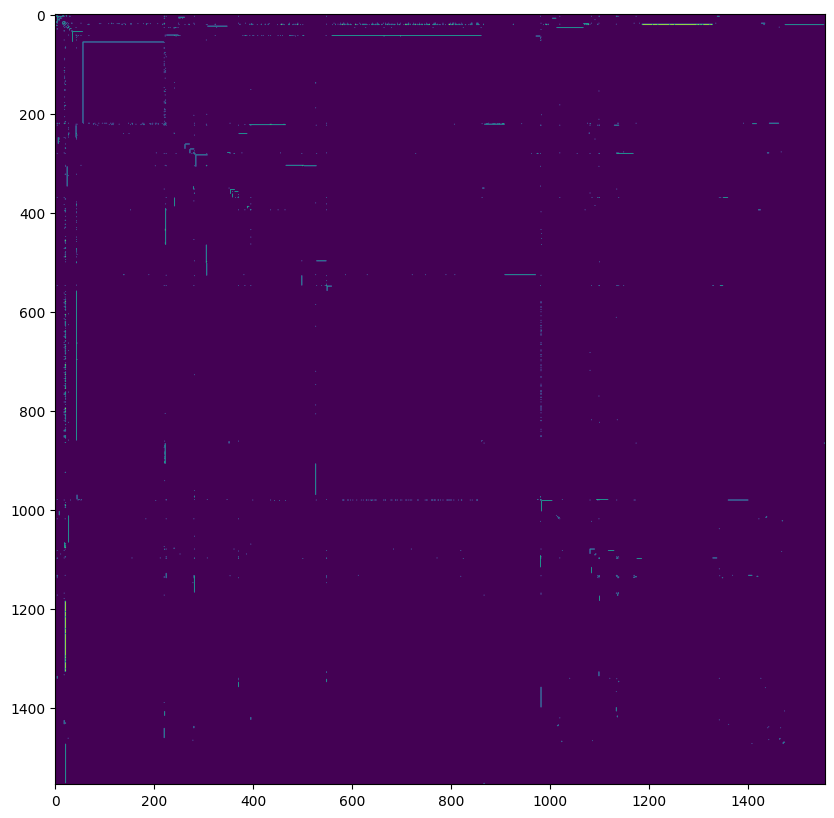

In [22]:
A = nx.adjacency_matrix(G)
fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
ax.imshow(A.todense());
plt.savefig("coronavirus_adj.pdf")

Text(0.5, 1.0, 'Coronavirous PPI Network')

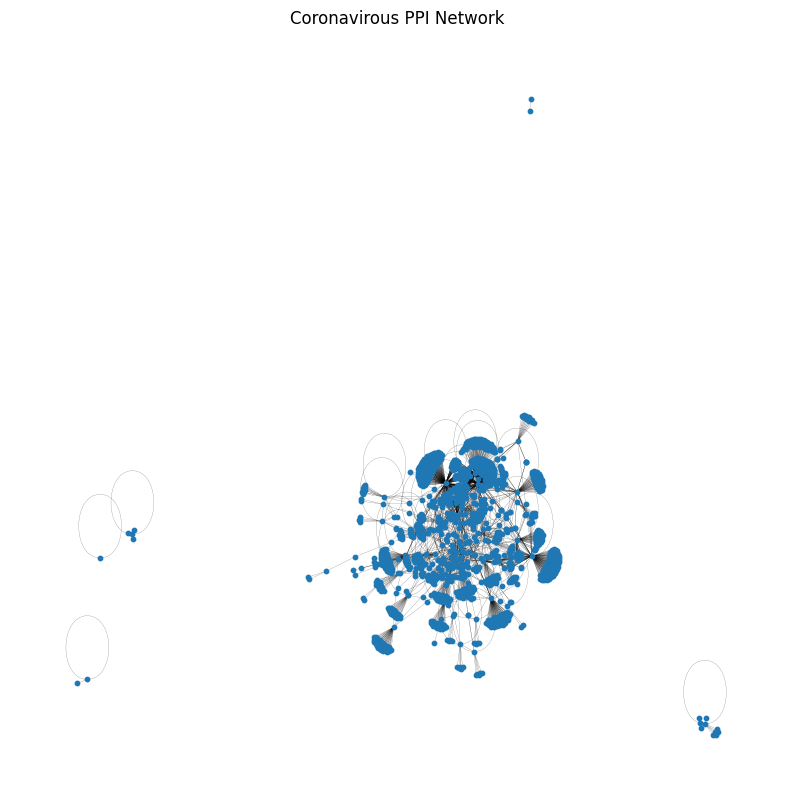

In [23]:
# Plot the full graph 

fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G, seed=1)
edges = G.edges()
weights = [0.1 for u,v in G.edges]
nx.draw(G, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.savefig("COVID_PPI.png", bbox_inches="tight", transparent=True)
plt.title("Coronavirous PPI Network")

In [24]:
# Compute the number of connected compoenents

n_cc = len(sorted(nx.connected_components(G), key=len, reverse=True)) 
print("Number of connected components in G:", n_cc) # Verify the result with the plot above 

Number of connected components in G: 6


Text(0.5, 1.0, 'The largest connected component in the Coronavirous PPI Network')

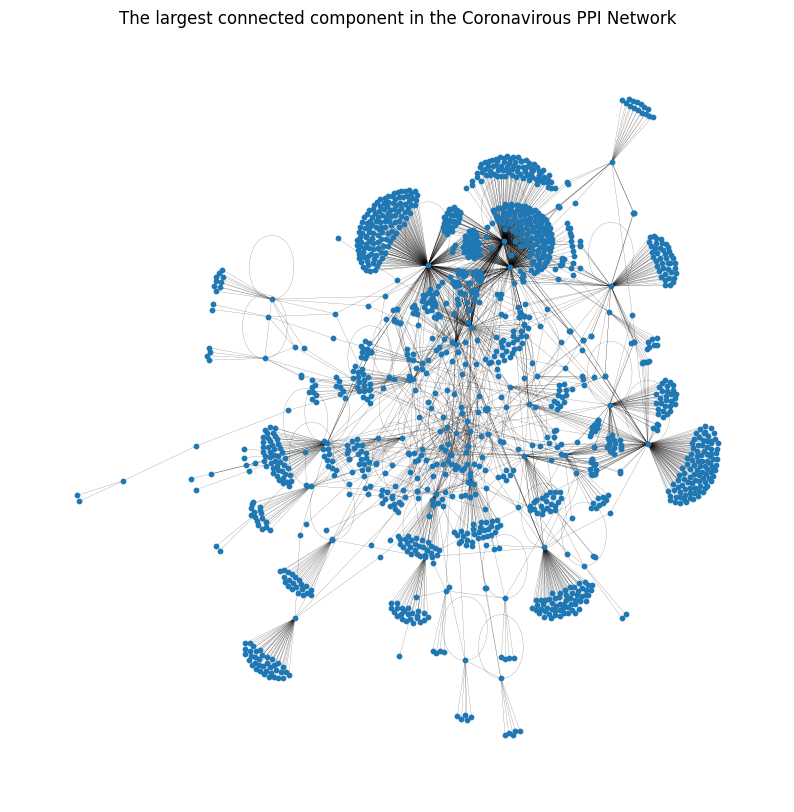

In [25]:
# Plot only the largest connected component 

G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G, seed=1)
edges = G0.edges()
weights = [0.1 for u,v in G.edges]
nx.draw(G0, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.savefig("COVID_PPI_connected.png", bbox_inches="tight", transparent=True)
plt.title("The largest connected component in the Coronavirous PPI Network")